# Thompson Sampling

## Algorithm Steps

## **Step 1: Define Variables**
At each round $n$, we maintain the following statistics for each ad $i$:

- $S_i(n)$ - the number of **successes** (clicks) for ad $i$ up to round $n$.
- $F_i(n)$ - the number of **failures** (no clicks) for ad $i$ up to round $n$.

## **Step 2: Sample from the Posterior**
For each ad $i$, we **draw a random sample** from a **Beta distribution**:

$$
\theta_i(n) \sim \text{Beta}(S_i(n) + 1, F_i(n) + 1)
$$

where:
- $S_i(n) + 1$ represents the number of observed **successes** plus one pseudo-count (Bayesian prior).
- $F_i(n) + 1$ represents the number of observed **failures** plus one pseudo-count.

## **Step 3: Select the Best Ad**
We select the ad $i$ with the **highest sampled value** $\theta_i(n)$:

$$
i^* = \arg\max_i \theta_i(n)
$$

## **Step 4: Observe the Reward and Update**
After displaying the selected ad $i^*$, we observe the reward $y_{i^*}(n)$, which follows a Bernoulli distribution:

$$
y_{i^*}(n) \sim \mathcal{B}(\theta_{i^*})
$$

- If $y_{i^*}(n) = 1$ (success), then we update $S_{i^*}(n) = S_{i^*}(n) + 1$.
- If $y_{i^*}(n) = 0$ (failure), then we update $F_{i^*}(n) = F_{i^*}(n) + 1$.

## **Summary**
Thompson Sampling uses **Bayesian inference** to balance **exploration** (trying less explored ads) and **exploitation** (choosing the best-performing ad). Unlike **UCB**, which constructs confidence intervals, **Thompson Sampling directly samples from a probability distribution** and is often more efficient in practice.


## Goal

The goal of training the Thompson Sampling algorithm for selecting the best advertisement is to maximize the total number of clicks by balancing exploration and exploitation.

![](./pic/ads.png)

In [1]:
colors ={ 'tab:blue': '#1f77b4',
          'tab:orange': '#ff7f0e',
          'tab:green': '#2ca02c',
          'tab:red': '#d62728',
          'tab:purple': '#9467bd',
          'tab:brown': '#8c564b',
          'tab:pink': '#e377c2',
          'tab:gray': '#7f7f7f',
          'tab:olive': '#bcbd22',
          'tab:cyan': '#17becf'}

## Libraries Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [3]:
%cat '../00_data/Ads_CTR_Optimisation.csv'|head

Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
cat: stdout: Broken pipe


In [4]:
%cat '../00_data/Ads_CTR_Optimisation.csv'|tail

0,0,0,1,0,0,0,0,0,0
0,1,0,1,1,0,1,0,0,0
0,0,0,1,0,0,1,0,0,0
0,0,0,0,1,0,0,0,1,0
0,0,1,0,0,0,0,0,1,0
0,0,1,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0
0,1,0,0,0,0,0,0,0,0

## Data Loading

In [5]:
data = pd.read_csv("../00_data/Ads_CTR_Optimisation.csv")

data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(10000, 10)

## Implementing Thompson Sampling

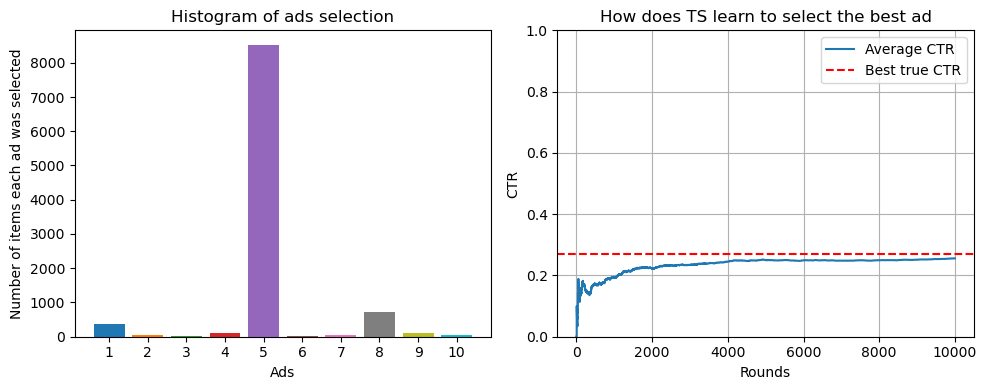

In [7]:
max_rounds, max_ads = data.shape          # Number of rounds, number of 
ads_selected  = []                        # index of selected ad during the round
# Step 1.
number_of_rewards_1 = np.zeros(max_ads)   # number of successes per ad
number_of_rewards_0 = np.zeros(max_ads)   # number of failures pre ad

total_reward = []                         # reward per each round

for n in np.arange(0, max_rounds):
    ad = 0
    max_theta = 0 # max theta (for Step 3.)
    for i in np.arange(0, max_ads):
        # Step 2.
        random_theta = np.random.beta(number_of_rewards_1[i] + 1,
                                      number_of_rewards_0[i] + 1)
        # Step 3.
        if random_theta > max_theta:
            max_theta = random_theta
            ad = i
    
    ads_selected.append(ad)
    # Step 4.
    reward = data.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    
    total_reward.append(reward)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
bins = np.arange(max_ads)
counts = np.bincount(ads_selected, minlength=max_ads)  # Count occurrences
axes[0].bar(bins+1, counts, color = colors)
axes[0].set_title("Histogram of ads selection")
axes[0].set_xlabel("Ads")
axes[0].set_ylabel("Number of items each ad was selected")
axes[0].set_xticks(np.arange(1, 11))

true_ctr = np.sum(data.values, axis=0) / max_rounds  
axes[1].plot(np.cumsum(total_reward[0:max_rounds]) / (np.arange(max_rounds) + 1), label="Average CTR")
axes[1].axhline(y=max(true_ctr), linestyle="--", color="red", label="Best true CTR")
axes[1].set_xlabel("Rounds")
axes[1].set_ylabel("CTR")
axes[1].set_title("How does TS learn to select the best ad")
axes[1].set_ylim([0.0, 1.0])
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

## Animate the learning process

In [8]:
import matplotlib.animation as animation

max_rounds, max_ads = data.shape          # Number of rounds, number of 
ads_selected  = []                        # index of selected ad during the round
# Step 1.
number_of_rewards_1 = np.zeros(max_ads)   # number of successes per ad
number_of_rewards_0 = np.zeros(max_ads)   # number of failures pre ad

total_reward = []                         # reward per each round

for n in np.arange(0, max_rounds):
    ad = 0
    max_theta = 0 # max theta (for Step 3.)
    for i in np.arange(0, max_ads):
        # Step 2.
        random_theta = np.random.beta(number_of_rewards_1[i] + 1,
                                      number_of_rewards_0[i] + 1)
        # Step 3.
        if random_theta > max_theta:
            max_theta = random_theta
            ad = i
    
    ads_selected.append(ad)
    # Step 4.
    reward = data.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += 1
    else:
        number_of_rewards_0[ad] += 1
    
    total_reward.append(reward)
 
#rounds = np.arange(50, max_rounds + 250, 250)
rounds = np.append(np.arange(50, 1050, 50), np.arange(1500, max_rounds + 500, 500))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# hist settings
axes[0].set_xlabel("Ads")
axes[0].set_ylabel("Number of items each ad was selected")
axes[0].set_ylim([0, max_rounds])

true_ctr = np.sum(data.values, axis=0) / max_rounds  

bins = np.arange(max_ads)

def update_hist(rnds):
    plt.cla()
    # plot hist
    counts = np.bincount(ads_selected[0:rnds], minlength=max_ads)  # Count occurrences
    hist_atrs = axes[0].bar(bins+1, counts, color = colors)
    axes[0].set_title(f"Histogram of ads selection ({rnds} rounds)")
    axes[0].set_xticks(np.arange(1, 11))
    # plot line
    line_arts = axes[1].plot(np.cumsum(total_reward[0:rnds]) / (np.arange(rnds) + 1), label="Average CTR")
    axes[1].axhline(y=max(true_ctr), linestyle="--", color="red", label="Best true CTR")
    axes[1].set_title(f"How does TS learn to select the best ad ({rnds} rounds)")
    axes[1].set_xlim([-250, max_rounds])
    axes[1].set_xlabel("Rounds")
    axes[1].set_ylabel("CTR")
    axes[1].legend()
    axes[1].grid()
    
    return hist_atrs.patches + line_arts
    
animation = animation.FuncAnimation(fig, update_hist, rounds, interval=200, blit=True)
animation.save(filename="./pic/tompson_sampling_demo.gif", writer='pillow')

#plt.show()
plt.close()

![](./pic/tompson_sampling_demo.gif)